In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [3]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("full_df.csv")
df.sample(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
4586,2121,56,Male,2121_left.jpg,2121_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2121_left.jpg
1560,2381,35,Male,2381_left.jpg,2381_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2381_right.jpg
2967,4415,31,Male,4415_left.jpg,4415_right.jpg,moderate non proliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4415_right.jpg
4472,1686,51,Male,1686_left.jpg,1686_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",1686_left.jpg
4142,1125,37,Female,1125_left.jpg,1125_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",1125_left.jpg


In [5]:
img_dir = r'C:\Users\KIIT\Documents\Deep Learning\preprocessed_images'

In [6]:
df = df.iloc[:,1:7]
df.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


In [7]:
df_left_cat = df[df['Left-Diagnostic Keywords'] == 'cataract']
df_left_cat.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
86,55,Female,103_left.jpg,103_right.jpg,cataract,normal fundus
100,59,Male,119_left.jpg,119_right.jpg,cataract,drusen
218,60,Female,254_left.jpg,254_right.jpg,cataract,macular epiretinal membrane
256,69,Female,294_left.jpg,294_right.jpg,cataract,normal fundus


In [8]:
df_rt_cat = df[df['Right-Diagnostic Keywords'] == 'cataract']
df_rt_cat.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
20,75,Female,24_left.jpg,24_right.jpg,normal fundus,cataract
93,57,Female,112_left.jpg,112_right.jpg,normal fundus,cataract
160,55,Female,188_left.jpg,188_right.jpg,laser spot，severe proliferative diabetic retin...,cataract
186,36,Female,218_left.jpg,218_right.jpg,refractive media opacity,cataract
309,65,Male,354_left.jpg,354_right.jpg,normal fundus,cataract


In [9]:
df_cat_filenames = df_left_cat['Left-Fundus'].append(df_rt_cat['Right-Fundus'], ignore_index=True)
df_cat_filenames.head()

0      0_left.jpg
1    103_left.jpg
2    119_left.jpg
3    254_left.jpg
4    294_left.jpg
dtype: object

In [10]:
df_cat_filenames.tail()

513    2239_right.jpg
514    2240_right.jpg
515    2242_right.jpg
516    2243_right.jpg
517    2246_right.jpg
dtype: object

In [11]:
len(df_cat_filenames)

518

In [12]:
# Sample Testing Image

(512, 512, 3)
2099_left.jpg


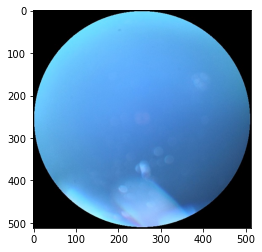

In [13]:
img = df_cat_filenames[34]
image = cv2.imread(os.path.join(img_dir, img))
plt.imshow(image)
print(image.shape)
print(img)

In [14]:
# Making a Grid Plot

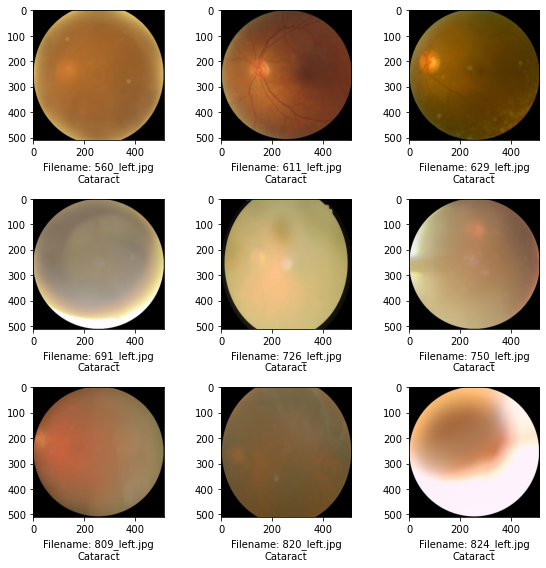

In [15]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_cat_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Cataract'.format(df_cat_filenames[i+9]))
    
plt.tight_layout()

In [16]:
df

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy
...,...,...,...,...,...,...
6387,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy
6388,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy
6389,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus
6390,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy


In [17]:
df_left_nor = df[df['Left-Diagnostic Keywords'] == 'normal fundus']
df_left_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
8,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration
12,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane
13,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers


In [18]:
df_rt_nor = df[df['Right-Diagnostic Keywords'] == 'normal fundus']
df_rt_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
9,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus
24,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus


In [19]:
df_nor_filenames = df_left_nor['Left-Fundus'].append(df_rt_nor['Right-Fundus'],ignore_index=True)
df_nor_filenames

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5496    4642_right.jpg
5497    4644_right.jpg
5498    4660_right.jpg
5499    4671_right.jpg
5500    4689_right.jpg
Length: 5501, dtype: object

In [20]:
len(df_cat_filenames)

518

In [21]:
df_nor_filenames = df_nor_filenames.sample(518)
df_nor_filenames = df_nor_filenames.reset_index(drop=True)
df_nor_filenames.head()

0    1610_right.jpg
1     2945_left.jpg
2     3339_left.jpg
3      307_left.jpg
4    2373_right.jpg
dtype: object

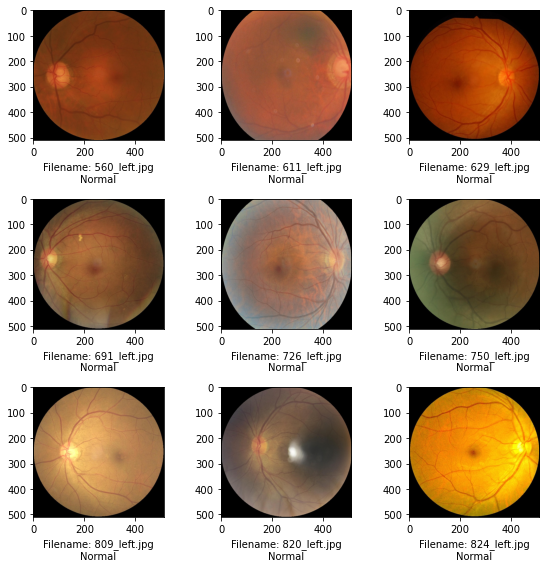

In [22]:
# Grid images of normal eye

plt.figure(figsize=(8,8))
for i in range(9):
    img = df_nor_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Normal'.format(df_nor_filenames[i+9]))
    
plt.tight_layout()

In [23]:
df_cat_filenames

0          0_left.jpg
1        103_left.jpg
2        119_left.jpg
3        254_left.jpg
4        294_left.jpg
            ...      
513    2239_right.jpg
514    2240_right.jpg
515    2242_right.jpg
516    2243_right.jpg
517    2246_right.jpg
Length: 518, dtype: object

In [24]:
df_cat_filenames = pd.DataFrame(df_cat_filenames, columns = ["filename"])
df_cat_filenames["label"] = "cataract"
df_cat_filenames.head()

,filename,label
0,0_left.jpg,cataract
1,103_left.jpg,cataract
2,119_left.jpg,cataract
3,254_left.jpg,cataract
4,294_left.jpg,cataract


In [25]:
df_nor_filenames

0      1610_right.jpg
1       2945_left.jpg
2       3339_left.jpg
3        307_left.jpg
4      2373_right.jpg
            ...      
513     1021_left.jpg
514     942_right.jpg
515     3415_left.jpg
516     2919_left.jpg
517    3328_right.jpg
Length: 518, dtype: object

In [26]:
df_nor_filenames = pd.DataFrame(df_nor_filenames, columns = ["filename"])
df_nor_filenames["label"] = "normal"
df_nor_filenames.head()

,filename,label
0,1610_right.jpg,normal
1,2945_left.jpg,normal
2,3339_left.jpg,normal
3,307_left.jpg,normal
4,2373_right.jpg,normal


In [27]:
df_combined = df_cat_filenames.append(df_nor_filenames,ignore_index = True)
df_combined

,filename,label
0,0_left.jpg,cataract
1,103_left.jpg,cataract
2,119_left.jpg,cataract
3,254_left.jpg,cataract
4,294_left.jpg,cataract
...,...,...
1031,1021_left.jpg,normal
1032,942_right.jpg,normal
1033,3415_left.jpg,normal
1034,2919_left.jpg,normal


In [28]:
df_combined = df_combined.sample(1036)
df_combined = df_combined.reset_index(drop=True)
df_combined

,filename,label
0,2147_left.jpg,cataract
1,2784_right.jpg,normal
2,85_left.jpg,normal
3,2572_right.jpg,normal
4,3290_left.jpg,normal
...,...,...
1031,2204_left.jpg,cataract
1032,3012_left.jpg,normal
1033,254_left.jpg,cataract
1034,896_left.jpg,normal


In [29]:
a  = np.array(df_combined.filename)

In [30]:
a.shape

(1036,)

In [31]:
paths = []

In [32]:
type(paths)

list

In [33]:
for i in range(1036):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

In [34]:
paths

['C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2147_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2784_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\85_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2572_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3290_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\949_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\726_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\4335_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3042_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2140_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2542_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2221_left.jpg',
 'C:\\Users\

In [35]:
data = []

In [79]:
data1 = []
# for i in range(1036):
#     img = paths[i]
#     image = cv2.imread(img)
#     image = cv2.resize(image,[299,299])
#     data1.append(image)
# data1 = np.array(data1)

In [36]:
for i in range(1036):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[224,224])
    data.append(image)

In [80]:
x1 = data1
y1 = []
for i in df_combined.label:
    if(i=='cataract'):
        y1.append(1)
    else:
        y1.append(0)
y1 = np.array(y1)

In [81]:
from sklearn.model_selection import train_test_split
x1_train,x1_val,y1_train,y1_val = train_test_split(x1,y1,test_size=0.2)
x1_val,x1_test,y1_val,y1_test = train_test_split(x1_val,y1_val,test_size=0.5)

print(len(x1_train))
print(len(x1_val))
print(len(x1_test))

828
104
104


In [37]:
len(data)

1036

In [38]:
type(data)

list

In [39]:
arr = np.array(data)

In [40]:
arr.shape

(1036, 224, 224, 3)

In [41]:
data = arr

In [42]:
type(data)

numpy.ndarray

In [43]:
x = data
y = []
for i in df_combined.label:
    if(i=='cataract'):
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

In [44]:
y[:5]

array([1, 0, 0, 0, 0])

### Splitting of Data in training,testing and validation set

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5)

print(len(x_train))
print(len(x_val))
print(len(x_test))

828
104
104


In [158]:
from keras.preprocessing.image import ImageDataGenerator

### Data Augmentation

In [167]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [160]:
from tensorflow.keras.models import Sequential

In [169]:
num_classes = 2

model = models.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


26/26 [==============================] - 35s 1s/step - loss: 0.7489 - accuracy: 0.5205
Epoch 2/30
26/26 [==============================] - 32s 1s/step - loss: 0.6403 - accuracy: 0.6256
Epoch 3/30
26/26 [==============================] - 32s 1s/step - loss: 0.5905 - accuracy: 0.6630
Epoch 4/30
26/26 [==============================] - 32s 1s/step - loss: 0.5621 - accuracy: 0.6920
Epoch 5/30
26/26 [==============================] - 31s 1s/step - loss: 0.5450 - accuracy: 0.7271
Epoch 6/30
26/26 [==============================] - 32s 1s/step - loss: 0.5325 - accuracy: 0.7560
Epoch 7/30
26/26 [==============================] - 32s 1s/step - loss: 0.5042 - accuracy: 0.7717
Epoch 8/30
26/26 [==============================] - 32s 1s/step - loss: 0.4833 - accuracy: 0.7742
Epoch 9/30
26/26 [==============================] - 32s 1s/step - loss: 0.4830 - accuracy: 0.7826
Epoch 10/30
26/26 [==============================] - 32s 1s/step - loss: 0.4632 - accuracy: 0.7935
Epoch 11/30
26/26 [===========

In [171]:
model.evaluate(x_val,y_val)

4/4 [==============================] - 1s 256ms/step - loss: 0.2977 - accuracy: 0.8750


[0.297660768032074, 0.875]

In [172]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:9]

[0, 0, 1, 0, 1, 0, 1, 0, 0]

In [173]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        48
           1       0.58      0.54      0.56        56

    accuracy                           0.54       104
   macro avg       0.54      0.54      0.54       104
weighted avg       0.54      0.54      0.54       104



In [47]:
x_train = x_train/255
x_train

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [48]:
x_test = x_test/255

In [49]:
x_val = x_val/255

In [50]:
print(y_train[:5])
print(y_test[:8])
print(y_val[:10])

[1 0 1 0 1]
[0 1 1 1 1 1 0 0]
[0 1 1 1 0 1 1 1 1 1]


# Thanks to StackOverflow

In [128]:
# from keras.applications.vgg16 import VGG16, preprocess_input
# # vgg16_weight_path = '../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# vgg = VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3)
# )

In [129]:
# for layer in vgg.layers:
#     layer.trainable = False

In [130]:
# from tensorflow.keras import Sequential
# from keras import layers
# from tensorflow.keras.layers import Flatten,Dense
# model = Sequential()
# model.add(vgg)
# model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(rate=0.5))
# model.add(Dense(128, activation='sigmoid'))
# model.add(layers.Dropout(rate=0.2))
# model.add(Dense(128, activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(Flatten())
# model.add(Dense(1,activation="sigmoid"))

In [131]:
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
# import tensorflow as tf
# def get_callbacks(model_name):
#     callbacks =[]
#     tensor_board = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0)
#     callbacks.append(tensor_board)
#     checkpoint = tf.keras.callbacks.ModelCheckpoint(
#         filepath=f'model.{model_name}.h5',
#         verbose=1,
#          monitor='val_acc',
#     mode='max',
#     save_best_only=True)
#     # erly = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#     callbacks.append(checkpoint)
#     # callbacks.append(erly)
#     return callbacks

In [132]:
# model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [133]:
# callbacks = get_callbacks('cnn')
# history = model.fit(x_train,y_train,batch_size=32,epochs=2,validation_data=(x_test,y_test),callbacks=[callbacks])

Epoch 1/2
26/26 [==============================] - 232s 9s/step - loss: 0.6992 - accuracy: 0.5507 - val_loss: 0.6275 - val_accuracy: 0.7019
Epoch 2/2
26/26 [==============================] - 221s 9s/step - loss: 0.4713 - accuracy: 0.8225 - val_loss: 0.3310 - val_accuracy: 0.8654


In [134]:
# model.evaluate(x_val,y_val)

4/4 [==============================] - 25s 6s/step - loss: 0.2456 - accuracy: 0.9135


[0.24557337164878845, 0.9134615659713745]

In [135]:
# model.evaluate(x_test,y_test)

4/4 [==============================] - 26s 6s/step - loss: 0.3310 - accuracy: 0.8654


[0.3309986889362335, 0.8653846383094788]

In [140]:
# from sklearn.metrics import classification_report
# from tensorflow.keras import Sequential

In [142]:
# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# y_pred = model.predict(x_val)

In [143]:
# y_predicted = [np.argmax(i) for i in y_pred]

In [146]:
# accuracy_score(y_val,y_predicted)

0.46153846153846156

In [148]:
# print(classification_report(y_val,y_predicted))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        48
           1       0.00      0.00      0.00        56

    accuracy                           0.46       104
   macro avg       0.23      0.50      0.32       104
weighted avg       0.21      0.46      0.29       104



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
np.argmax(model.predict(x_test)[0])

0

# Transfer learning

## Mobilenet V2 Model

In [72]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [175]:

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [182]:

x0_resized = cv2.resize(x[0], IMAGE_SHAPE)
x1_resized = cv2.resize(x[1], IMAGE_SHAPE)
x2_resized = cv2.resize(x[2], IMAGE_SHAPE)

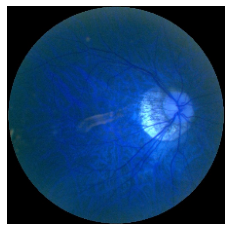

In [186]:
plt.axis('off')
plt.imshow(x[2])

In [187]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([620, 418, 418], dtype=int64)

### Taking a pretrained model and retraining it

In [188]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [189]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [191]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
26/26 [==============================] - 32s 990ms/step - loss: 0.3652 - accuracy: 0.8454
Epoch 2/5
26/26 [==============================] - 26s 981ms/step - loss: 0.1524 - accuracy: 0.9469
Epoch 3/5
26/26 [==============================] - 26s 983ms/step - loss: 0.1346 - accuracy: 0.9493
Epoch 4/5
26/26 [==============================] - 26s 982ms/step - loss: 0.1215 - accuracy: 0.9565
Epoch 5/5
26/26 [==============================] - 26s 984ms/step - loss: 0.1175 - accuracy: 0.9589


In [194]:
model.evaluate(x_val,y_val)

4/4 [==============================] - 3s 748ms/step - loss: 0.1636 - accuracy: 0.9231


[0.1636180281639099, 0.9230769276618958]

In [197]:
y_pre = model.predict(x_val)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[0, 0, 0, 0, 1, 1, 1, 0, 1, 1]

In [196]:
y_val

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [199]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        48
           1       0.98      0.88      0.92        56

    accuracy                           0.92       104
   macro avg       0.93      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



In [200]:
img = cv2.imread(r'test_img.jpg')

In [202]:
img.shape

(274, 300, 3)

In [203]:
img = cv2.resize(img,[224,224])
img.shape

(224, 224, 3)

In [208]:
img = img/255

In [209]:
z = []

In [210]:
z.append(img)

In [211]:
img = cv2.imread(r'test_img2.jpg')

In [212]:
img.shape

(469, 600, 3)

In [213]:
img = cv2.resize(img,[224,224])
img = img/255
img.shape

(224, 224, 3)

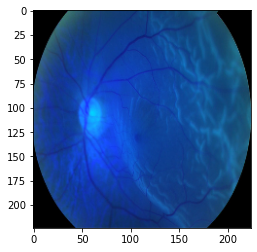

In [215]:
plt.imshow(img)

In [216]:
z.append(img)

In [218]:
z = np.array(z)

In [219]:
z.shape

(2, 224, 224, 3)

In [224]:
s = model.predict(z)

In [227]:
s1 = [np.argmax(i) for i in s]
s1

[0, 0]

# EfficientNet B4

In [238]:
model1 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
                   trainable=False,input_shape=(224, 224, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [239]:
num_of_classes = 2

model1 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1000)              19466816  
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 2002      
Total params: 19,468,818
Trainable params: 2,002
Non-trainable params: 19,466,816
_________________________________________________________________


In [240]:
model1.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)

Epoch 1/5
26/26 [==============================] - 178s 6s/step - loss: 0.6794 - accuracy: 0.7790
Epoch 2/5
26/26 [==============================] - 192s 7s/step - loss: 0.6706 - accuracy: 0.7874
Epoch 3/5
26/26 [==============================] - 117s 4s/step - loss: 0.6620 - accuracy: 0.7947
Epoch 4/5
26/26 [==============================] - 85s 3s/step - loss: 0.6538 - accuracy: 0.7959
Epoch 5/5
26/26 [==============================] - 84s 3s/step - loss: 0.6458 - accuracy: 0.8043


In [234]:
model1.evaluate(x_val,y_val)

4/4 [==============================] - 20s 3s/step - loss: 0.6538 - accuracy: 0.8173


[0.6538177132606506, 0.817307710647583]

# Using VGG-16 Model

In [59]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras import layers,models
from keras.layers import Flatten,Dense
from keras.models import Model

In [52]:
IMAGE_SIZE = [224,224]

In [53]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [54]:
for layers in vgg.layers:
    layers.trainable = False

In [55]:
x = Flatten()(vgg.output)

In [57]:
prediction = Dense(2,activation = 'softmax')(x)

In [61]:
model2 = Model(inputs = vgg.input, outputs = prediction) 

In [62]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [67]:
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [68]:
model2.fit(x_train,y_train,epochs=5)

Epoch 1/5


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


26/26 [==============================] - 208s 8s/step - loss: 0.7999 - accuracy: 0.7065
Epoch 2/5
26/26 [==============================] - 211s 8s/step - loss: 0.2275 - accuracy: 0.9130
Epoch 3/5
26/26 [==============================] - 208s 8s/step - loss: 0.1897 - accuracy: 0.9348
Epoch 4/5
26/26 [==============================] - 206s 8s/step - loss: 0.1684 - accuracy: 0.9396
Epoch 5/5
26/26 [==============================] - 195s 7s/step - loss: 0.1419 - accuracy: 0.9553


In [70]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 23s 5s/step - loss: 0.1938 - accuracy: 0.9231


[0.19379903376102448, 0.9230769276618958]

# InceptionV3 Model

In [74]:
num_classes = 2

In [83]:
model3 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1",
                   trainable=False,input_shape=(299, 299, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [89]:
pretrained_model_without_top_layer = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1",
    input_shape=(299, 299, 3), trainable=False)

In [90]:
model3 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_classes)
])

model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [91]:
model3.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [92]:
model3.fit(x1_train,y1_train,epochs=5)

Epoch 1/5
26/26 [==============================] - 100s 4s/step - loss: 0.7084 - accuracy: 0.4783
Epoch 2/5
26/26 [==============================] - 94s 4s/step - loss: 0.7084 - accuracy: 0.4783
Epoch 3/5
26/26 [==============================] - 94s 4s/step - loss: 0.7084 - accuracy: 0.4783
Epoch 4/5
26/26 [==============================] - 95s 4s/step - loss: 0.7084 - accuracy: 0.4783
Epoch 5/5
26/26 [==============================] - 95s 4s/step - loss: 0.7084 - accuracy: 0.4783


In [94]:
x_train.shape

(828, 224, 224, 3)

In [11]:
import matplotlib.pyplot as plt

data = b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\xb2\x01\xcc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xc4\x00\x1f\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x11\x00\x02\x01\x02\x04\x04\x03\x04\x07\x05\x04\x04\x00\x01\x02w\x00\x01\x02\x03\x11\x04\x05!1\x06\x12AQ\x07aq\x13"2\x81\x08\x14B\x91\xa1\xb1\xc1\t#3R\xf0\x15br\xd1\n\x16$4\xe1%\xf1\x17\x18\x19\x1a&\'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x82\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xf9\xd6\x0bu\\\xfb5X\x8a\xdf\x8d\xdbH\x06\xa4\x86\x1d\xcb\xf7}\xff\x00\x1a\xb5\x14\x1c\x06\xf4\xaf\x9b=\x02(\xa0`\x06T\xe4\xf3\xf4\xa9\xe3\x83w\xcb\xb7\x19\xfdjX\xd1w\x18\xd7>\x95,p\xa8s\xbb\xb5K`6\x08\x0b\x0c\xec<pjh\xa0\xe4\xfc\xb8\xf7\xa5\x8d9\xe9\x80\x0e~\xb5<H\xbb\xb8^\xb5%Dc#er\xbc\x1a\x99c\xdcB\xa8\x1fZO-\x8a{\xe7\x1dz\xd4\xb1\x00\x89\xb9\x97\xda\x80Hu\xban\x93\x9e1\xde\xb4-\xa3f\x8c\x82\t\xaaq(BJ\xaf|\x8c\xd6\x85\x99\x0b\xc1\\\xd0\x1c\xa4\x96Q\xe0\xae\xd3\x8d\xa6\xbc\xab\xe2\xab\xddX\xf8\xeb_\xf1$^\x1b-\x1aIg\x80\x9cy\xca\x17\x94\xfa\x10k\xd6\xacS\xe7f\xc0\xe4\xd7\x82\xfe\xdb\x16:\xb6\x97\xf0\xbb\xc4\x9a\xc6\x81w$Wmy\nO \x90!6\xec9Q\x9e\xa7?\xa5K\xdd\x1bP\x8f5D|Wm\xe2\x9d&\x1df\xe6\xe6\xe3\xc3q\xbe\x9fspek\x05r\n\x82y\x08\xe3\x958\xc1\xcfz\xb1\xae\xeb\xfa4\x1e \x98x>\xea\xfa-9\x8a\xb5\xbd\xb6\xa4\xdev\x069\x04\x9e\xd9\xe9T\xfc/i\x15\xd1\x16\xeb\xe1Y\xef.\xa7b\xb1\x15\x91\xbebGM\xbd3\xde\x93F\xf1\x15\xcf\x86d\xfb\x06\xa5\xe1\xf8n\xe2]\xd1\xc9\x15\xdc9e<\x8c\x06\xea\x08\xad\xed\xd1\x1e\xa5\x93\x96\x8b\xf1\xfcM\xf6o\x10\xf8\xa9-\xbf\xb3\xfc6\x17\xecxq>\x87\x18\r\xcfv\xdb\xd4\xf7\xe7\xa5I\xaex\x93\xc3o\xad\xc9\xab\xea67\xb2k\x10\x95R\xaa\x82\x15.\xb8\xc1\x90\x0eX\xd7=\xe1\x8b_\x1c\xf9\x82o\x08Ix\\\xb0\xdc\x96E\xf7\xe39\x00\x85\xe7\x8a\x8e\xf6MB\xe3Z\xbe\x93Z\x92W\xb92\x91;H>b}\xfd\xfe\xb5\x9c\xae\x8diR\x83\x9d\x86\xf8\x9fX\xd6<I\xa9\xcd\xaekWRMs(\xc9w9\xc6:/\xd3\x15F\x18\xb7bB\xa4\x93\xc2\x80+B8\x96Hq(f\x00\xf4\x03\xb5Y\xd2nt\r&\xfe;\x9f\x10\xdf$\x16\xc8r\xca>fom\xb4\xa2\xa5-\x11\xb5Y\xc2\x8a\xd5\xe8lY\x08>\x1c7\x87\xbc_&\x96\xaf\x1b\xce\xec\xc4\xbe7\x91\xdc\x9e\xddk\x8a\xd6~-x\x93M\xbf\xbd\xba\xd3\xb5\x93f\xd7\x17\r!\xf2\x13,A\'\xf8\x8f#\xadl|G\xf8\xc3\xe1\xef\x12h?\xf0\x8f\xe9\x8cZ\x08\xa6\xcca\xd3\r\x18\xff\x00d\xd7\x9f-\xbe\x87\x7f\'\x9d3\xbb\xb1\xfe\xf4\xb8\xafB\x86\x1d%y#\xc2\xaf\x8a\x95Gh\x95o|q\xaeK<\xadi\xa9\xdd!\x9b\xfdn$??\xd4\n\x8a\xdb\xc6\x1e)\xb5t\x9a\rV\xe8\x98\xbe\xe0i\t\xc7\xd3=+FX\xad\xe0\x07\xec\xb0\xa8\x1f\xdf\x0c\x08\xfd*\xb4\xf2\x90\xfb\xa4\x8c0\xed\x81]J0\xecq\xf3\xd4R\xdc\xeb\xfe\x19\xfe\xd2\x9e3\xf0\x06\xa9m~\x90\xc0\xfeL\xc1\x9d\x84*\x1aA\x9eC\xff\x00z\xbbm[\xc6\xbe\x1f\xf8\x99\xaej\xbe0\xd0\x19-\xe4\xd4\'\x8d\x96\xcd\x06\xdf-\xb3\x92F:s\xda\xbcH\xcbk \x01\x89\x8ff\\\x8a\xb5\xa4jwz\r\xfcz\x86\x9f#\t\x10\x83\xb9\x0e\t\xc7\xb5aW\x0bNZ\xc5Y\x9dT1\x95)\xcb]Or\xf8\xb1\xf0\xf3Q\xf0m\xf5\xae\xa5q4\xb7V\xfa\x9d\xba\xc9\x05\xd3\x9c\x86l|\xcaO\xa85\xc6\xbd\xb8\xda\n8$pF+\xd4\xbc\r\xf1\xdbJ\xf8\xc3\xe18~\x16x\xc7M\x85\x80\x01\xad\xee\x90\xed\x92)\x00\xfb\xc3\xd0\xfa\xf6\xac\x7f\x1b|\x07\xf1\xb7\x86\xe3mN\xde\xc1\xefl1\xf2\xdc\xdb\xa0c\xff\x00\x02Q\xd0\xfb\xd7\x97(\xbar\xb3=\xcc6.\x13\x8d\x9b8\x9b=\x7fR\xd1.\x12\xefK\xbdx_iV(p\x18z\x1a\xea4\xdf\x8c>!\xd4\xa3\x8e\xc6\xe0\xd8\xdb\xf9\t\xb5nZ\xd4\x17\xc6y\xe6\xb8\xedJ\xd8\xc2\nJ\xac\xac1\x9d\xc0\xe4V\xa7\x814o\x02j7\x12G\xe3\xbd~\xe6\xc65\x19\x89\xeda\x0eX\xfe4&\xad\xa9X\x88E\xea\x88\xb5\x9d+U\xd6\xfcE/\xf6N\xa6\xf7\xea\x8c\x19.6\xe5pz\x93\xdb\x03\xa5T\xd4\xef\xf5\xaf1>\xd1\n(\xb4\x97\x0b\xe4 \n\x1b\xff\x00\xafS\xf8\xbe\xf7K\xd2\xb5)\xb4\xaf\x03\xea\xd72\xe9g\x1b\x1ao\x92G=\xf3\x8fz\xd3\xf0\xae\x8d\xaf\xf8\xb3\xc2\xd7\x966w\xfam\xad\xbcv\xadq7\xda$\x0b$\x86>v\x8fz\xd1\xdf\x97C\x06\xb5\xb3={\xc3\xb3\xdcOiosx2\xefj\x87#\xbf\x15\xea?\x0f\xf1\xf6t\xdb\xf45\xe3\x7f\n\xdf\xcd\xf0\xdd\x99\xfbKK\xfb\x900\xd8\xca\x9fJ\xf6\x0f\x87\xc4\xf9j\x17\x00\x06\xac\x9d\xaex\xf5\x12Rh\xf4]%3&~\xef\x1fw5\xd0\xe9\xe8\x1c\x00Es\xfa`o1C0\xe4WG\xa7\x0e\x06[5D\x1a\x96q\xf4\n\xfc0\xfc\x98\xc7C\xd6\xaa\xd8\xa8\x07>\xd8\xad\x08",\x0f<t\xa0\x06\x98\xb2\x03\x0c\x81\xdf4\xaf\x1a\x93\xf7p{\n\xb1\xe5\x00\x01\x0b\xc7z\x1a\x06\x04\xb9=G\x14\x01M\xe1\xdc\xb8+\xcej\'\x8c\x1e\x08<w\x1d\xaa\xfbD\xc0\x00z\ncA\xd4\xe4\xe7\x1dh3)\x18G\x0c?/Z\x8c\xc4\x14\xee#\x1c\xf4\xab\xcf\tb\x08\xe9\xeaj6\x81\xb7\x1c\x8e\x9e\x94\x14\xd5\x8ao\x08\x07\x00\x0f\xc6\x9a\xd0\xe0ci\xabf\x0cw\xeb\xda\x91\xa2;w\xe3\xbfj\x05},P\xf2\x00\xec\x7f\x1ak@\xa9\xd0g5u\xa0$\x8d\x80\xf2;\x9ac[\x90pz\xfdh\x11\x9a\xf6\xec\x1fp\x1cTm\x16\t\xdc\x99\x1fZ\xd0\x9a0\xa7\r\xd6\xa00\x05\xe3\xb9\xe9AI;\x94%\x88(\xce1\xebQ\x8bq\x8c\x90H>\xb5}\xed[\xaf \xfbS>\xca\xc1\xb2W\xf3\xa0\x93=\xa0\x19\xfb\xb5\x14\x96\xc3\x19\x02\xb5$\xb6=\xd7\x15\x0b[pW\x14\x01\x94\xf6\x99\xc9\xe3\xf1\xaa\xb3\xd9\x0er>\x98\xad\x99m\xc2\x9c\x95=\xbc\xd6\xe38\x03\xa7jw`bKk\x81\x80\xa7\xde\xaaOh3\xc2\xf3\xf4\xad\xc9\xed\xb1\x93\xeb\xd8UY\xed\xc09 \x9a\xb01g\xb3\xdd\xf2\x9f\xe5U\x1a\xd3\xe6=\xbd\xabn\xe2\xd1\xb3\x821U%\xb4\x1b\xf8\xa0\x0e\x9a8\xb0\x87b\xfb-L\xb1\xedN\xf9?\xca\x9c\x13r\xfdjEL\x01\xdf\xb5+\xa0\x08\xe2\xd8\xdf75(O\x9b\xe9I\xb3\xe6]\xab\xff\x00\xeb\xa9Upv\xa2\xf5\xeb\x9a\x80\x11\x07\x1b\x94\x7f\xf5\xaaH\xb3\xb8\xe5\xbe\x82\x90F\xd8<q\xedRC\x19`N9\xa0\x05\n\xce\xbb\xb3\x81\x9f\xce\x9e\x8b\xb8\x05\x03\x03\x1d=)b\x8f\x19=q\xd8\xd4\x91\xa7\x1b\x99A?\xc3\x8a\x0b[\x0eU\xc6\x063\x91W\xed\x14\x95\xcdSC\xb8\x82\xeb\x82:{\xd5\xebA\xd0\xec4\x0c\xb3l\x18\xbe\x05y\x17\xed\xb9\xe1d\xf1\xaf\xc3s\xe1\xa9O\x90\xcf"\xcdop\xa3\x90\xc3\x82\xa7\xd4W\xaf\xdaE\x89@\xf5=k\x8a\xfd\xa2b\xb0\x93D\x8bP\xd7\x80M7N\xb6\x92{\xd9\x08\xea\xa3\x90\xbf\x89\xa0\xbaNQ\x9f\xbb\xb9\xf2\x07\x87>\x00\xeb\xe9a4\xb7\xbe?M2\x1bX^X%\xb1,\x8e\x8aJ\x85n\xa4\x93\x8a\xf2M\x1bNO\x10x\xbc[\xf8\x9f\xc4\xab\nM!3\xddo\xe7y\xeb\xf5\xe7\'5\xbd\xe3\xbf\x8b\x97^?\xf1\xd2j^#3.\x91\x1c\xb8\x86\xca2UV\x11\xf7p=\xf1\xd6\xb6\xbc?\xf17\xe0\xb2\xdd\xad\x8e\xb5\xf0\xf0En\xc4\x0f<\x80\xc7\x1e\xa6\x9f\xbd\xb9\xea(U\x84-\xd5\xf6\xb6\x84\x9f\x15\xfe\x1e\xda|+\xd1\xf4-[\xe1\xe7\xc4\x1b\x9b\xb7\xd5\xd2In\'\x82]\xab\x11\x1d\x13\x8e\xf5\x99\xf0\xaf\xc1:\x1f\x8a\xf4\xab\xff\x00\x14x\xe3Y\x92\xd9#\x90\xb4\xf33p\xc3\xd4\x93]\x8f\x8e~\x0ex3\xc4>\x08\xb8\xf1o\xc2\xdf\x134Q[\xa1\x9a].yO\x96\xca\x06I\\\xf45\xe1>\xf1\xce\xa5\xabX\xa6\x81l|\x8b8To\x823\x81)\x1c\xe5\xcfq\x9e\x82\xaa\x95\'V\xe9\x99\xd5\xc4rQVz\xdf\xe6Z\xf1\xb7\x8ct\xb5\xbf\x9e\xc7\xc1r\x1f\xb1\xa9.Yy8\xf45\xc3]3H\xe6{\x99\x99\xe5a\xf2\x979\xc0\xab\xf6\x96\xb7\x0c\x9es\xa1\x91\xf3\xfb\xb5+\x80\x07\xae;\n\xab|\xf6\xd6a\x99\xee\x07\x98z\x91\xcf\xeb^\x958\xc2\x1a#\xcc\xa9)\xd4\xd6FO\xf6{H\xcc\xc27\xda\xde\x8aFiln^\xce\xe0\xdb\xacQ\x8fgRj\x1b\xfdI\xcb\x9f*\xec\xe7\xd9\x88\xac\xe9\xefg\x94\x94\xb8;\x81\xe8\xfd\xc5uF.G,\xdcbt\xd3G3\xc3\xe7(V>\x88*\x84\xf7\r\x14\xa0\xa9##%J\xf4\xf6\xac\xdb\x1b\xadV\xc9\x84\x91\xce\xde^z\x1eA\xadiL\x1a\x94[\xa38|s\x8e\xc6\x93\x8f+%J\xfa\x95^\xe69\xf2v\x0e;\x01\xd2\x98/&\x83\xe6\xce}\t\xf4\xa8\xf0\xd1>\x18\x10:qS\xf1"a\x940+\xd35Eo\xa9oJ\xf1\x0c\xf0]%\xe6\x9ft\xf6\xd710dt8\xe9^\xcd\xf0\x9f\xf6\x99\xf8\x81\x15\xfa\xe8\xd7\xde\'U\x92L K\xcc\x18\xe4>\x87=\x0f\xa5x\x14\xb6\xcc\x0e\xf8x9\xe3\x9a\x9a\xca\xef\xedDE;\x15\x91?\xd5\xbfp}\x0f\xb5cW\x0f\n\xb16\xa5^Pz\xec}\x9b\xa8\xff\x00\xc2#\xf1\x07\xe1\x7f\x88\xf5K\xbd\x0e\xde\x0f\x12i\xb0)\x92\xd4\xc2\x0e\xe5\xdd\xf3:\x9f\xa1\xcdy\'\x81d\xf0\xf6\x9d\xab\xb4\xde&\xd3\x96\xea\x16O\xdd\xc2\x06\xed\xecOJ\xcf\xfd\x9f~5\xff\x00`x\x9a\x04\xf1l\x9e|I\x0f\x95"\xc9\xc8\x951\xc2\x13\xdcv\xafO\xf8w\xe1\x1d\x02\xfa?\x11|m\xd5\xb4\xe5\xb6\xd1\xf4\xd93eh\xa3\x89ec\xf2\xa0\xf6\xe9^5JN\x8c\x9ag\xb5F\xaa\xabKC\x17U\xf8{\xe2O\x1b\xe9\x8f\x07\x86>\x12\x9bb&y\xd2\xe1\x1b\x0f\xb4\x8d\xa0\x1c\xf6\x18\xcdM\xe0\x9bo\x84\xb1jK\xe1?\x89~\x1e\x9fO\xbf\x8aO.ic\xb8!Kz\x1ct\xcdb\xdf\xfcb\xf1\xdc\xfa\x8c\xba\xbd\xb6\xb9=\x9a\x1e"\x8a\xd5\xf6\x003\xc2\xe3\xd0U/\x08\xc1\xa5x\xb7\xc5\x89\x17\x8b\xa6\x90\x9b\xc2\xea\xd3\xe7$J\xdd\x18\xfe5+cyQ\x97&\xbf\x81\xf4\x0e\xb9\xe1\x0f\x0b\xf8BK\x0b\x1f\x08\x1cY\xbd\x98d\xf9\xb7g\xf1\xae\x9b\xc0\x12`c\xd0\xf0k\xcb|\x0bu\xaeZ\xcf7\x82\xfcF\xfb\xe7\xd1\x9f\xcbGs\xcb\xc6~\xeb}+\xd4<\t\x8f8\xa7\xa1\xa5\xd4\xf1\xea\xc1\xc6Z\xbb\x9e\x97\xa6\x8d\xf2#\x13\xdb\xadtv)\xc0;\x8f\xd2\xb9\xbd4a\x17+\xe9\xcek\xa8\xd2\x94\xec\x04\x8c\xf1Tdk\xd8\xa9\x03\x00t\xe6\xb4m\xc69\xc7Z\xa9d\xa0(C\xc6}\xebB$ `\x0e\x05\x00I\xb4\x85\x19\x14\xe1\x18 u\xfci\xe1\tL\xaf\xe1K\xb3\x18\x07\xf1\xa0\x08\x1e>O\xb1\xf4\xa6:\x15\'\x0b\xd4\xf5\xab-\x16I\xfe\xb4\x8d\x1e\xe6\x00\x921\xd2\x80*\x98\xb3\x90\xc7\xb5DQs\x82\xdc\xf6\xab\x8d\x1f@Nj&\xb7@\xd8=\xcd\x02{\x15\x9a3\xdc\x03\x81\xde\x9a\xd1\xee\x00\xe0\xd5\x86\x89\x83\x12Fy\xe3\xe9C!#\x91@\xd6\xc5V@\x07?\xadE"\xfc\xe4\x8cw\xe2\xad\xb2\x93\xf2\xe2\x99$G\x19q\xc6=(\x13\xdc\xa1$a\x86\xe0s\xe9\xc5G\xe4\xee\x07\x9a\xbc\xf1\xf6#\x8cq\xc5G\xe4\xa2\x8cg\x07\xb5\x03{\x14\x84\x0e\xa4\x9cc\xf0\xa4\xf2G\xde\xcf9\xf4\xab\xbeJ\xe3\x81\x8f\xebQ\x98\xc0\'h\xa0\x82\xb1\x88\x91\xbb9\xa8\x9a\x14\x19n\x875s\xc98\xc9\x02\x9a\xd0\xf5\xa0\x16\xc6{\xa1/\x92\xbfJ\x82[S\x92\xc4\x0eG\x15\xa3$8\xfc\xe9\x93[\xe7\x1e\x9fJ\x04c\xc9\x01+\x80\xbc\xfa\xfa\xd5im\x01\x1b@\xe0\x9a\xd8{lf\xab\xcbj\xd8\xc8\x14\x01\x8f=\xb7\xcc~P{UIm\t~1[sZ\xb0\x04`\x0c\xf3U\x1e\xcd\x8bujw`i\xec<\x12?!J\x91\x90\x19q\xee)\xc2<\x1c\xb1?J\x90G\xb7 \nEr\x8dDPF\xfe\x08\xa9\x11\x08b\xc7\xae{\xf7\xa5\x08\xa0\x93\xb7vjX\xe3\x0c6w8\xc14\x07\xbc1#\xde7\x0e\x82\xa6\x89r\x00Q\xd6\x95!#\xa2\x9c\x03\x8a\x92(\xb9\x1c\x1f\xc2\x80L\x16?\x97\x8c\x03\xe9\x8e\xb5,1\xfc\xb9\xdb\xdb\x9ar\xc6q\xb8/S\xc1\xa9!\x8f\t\x81\xf54\r;\x8c\x8e!\xbc\x10\r[\xb5V\xf3\nl$\x0crj(\xd1\x8bc\x1d=\xaa\xe5\xbc]\xc0\xe7\xd2\x81\x96-b_2\xbcg\xfe\n)\xac\xde\xe9_\xb3\x91\xb3\xb1p\xaf\x7f\xaaG\x04\x8d\x9c\x1d\xb8\xce?:\xf6\xbbDa\xa8\x1d\xfb\xd7\x9c~\xd9~\x01\x7f\x88\xdf\x02o|=k\xb7\xed\x918\xba\xb0S\xd5\xdd9+\xf8\x8c\xd2f\xb4\x1aUn\xcf\x81\xbe4\xd9\xc2\xbe!\xd3\xbc1el\x91\xae\x9d\xa4A\x12\x18\xd4\x02\xe4\xa0<\x9e\xfc\xd7 \xf6\xcd\xe4\xb4\x19\xc9\xec\xa7\xb1\xafH\xf1\xaf\x87\xef\xbe h\xd6>-\xd0a\xdd\xa9Y\xdb-\xb6\xabe\x9cH\xad\x18#p\x1f\x85p\xff\x00\xf0\x8f\xeb\x11\xcad\xb9\xd3\xe5\x88\x01\xcf\x9a0I\'\x06\x9a=\xb8J\x1e\xc5;\xea\x8aw\x9e2\xd6\xb4\xcf\x0b\xb7\x87\xec\xee\xe4H\xaex*\x0f\xde\x1e\x98\xf4\xac\xad+\xc37W%m\xdd\x14\x86\xf9\xe4s\xd3\x1d\xc9\xfc\xb3\x8f\xa5^\x86\xc6=GY\x92\xed\xd7\xfd\x1a\xd5H\x0c\xfc\x03\x8e\xff\x00\x8f\xf2\xa9\xf5\xcb\xd3\xa0xFK\xb2\xc7\xce\xba\x07\x0c\x7f\x85\x01\xc7_s]\x8a^\xce*+vy\x12N\xa4\x9c\xa5\xb1\xc8\xf8\xdb\xc56\xbak\xbe\x99\xa5\x10v\xfc\xad&:\xd7\x1d%\xfd\xc5\xf4\xd8ws\x93E\xe3\\\xea7\xf99fbq\x9a\xed<\x03\xf0\xde\xf7Q\x95\x16+F\x92g\xe9\xf2\xe4\n\xeer\xa7\x87\xa5\xcd#\x8a1\xa9\x8a\xabh\xecs6>\x15\xbe\xbd\xe4.\x18\xf4\x15\xb3e\xf0\xba\xfd\xc8y\xd1\x94\x0e\xbb\xab\xde|\r\xfb9j\x0eVK\xbbv\x07\x82\xcc\xcb\xd4zV\xc7\x89~\x16\xb5\xbb=\x9c\x16\xe42\x02A\xc7A\xe9^L\xf3\x8an|\xb1g\xafO%\xa9\xec\xef#\xe7\x89\xbc\'\xb0\x18m\xe2\xdc\xaa:\x8f\xd6\xa8G\xa2\xad\xaboX\xca\x9c\xe0\x808?Z\xf7E\xf8N\xf1B\x81\xa3\xc3\x9e[\x8e\xfe\x95\xccx\xab\xc0"\xca\xed\x86\xc0\xb9\xea1\xd0\xd6\x94s\x08\xd4\x95\xaegW,\x9d8\\\xf2Mf\xc5\xe2c$k\xd7\xa8\xaa1\xce\xeb\xc4c\xa7U\xfe\xb5\xda\xebz\x07\xd9\x97c\x0c\xa9\xeb\x8a\xe3\xf5K\t,n\x0c\x8a2\xb9\xea;\x1fJ\xf4\xe9TSG\x97Z\x94\xe9\xbdHZUW\xf3\xc2\x92\x1b\xef\n\x8e\xea\x02\x80^\xdb\xfd\xde\xe4v\xa0\xb2\x83\xb3\xaa\xb7OcN\xb2\xb9\x11Nm\xa5\xe5\x18`\x8a\xda\xcd\x18\xef\xb9b\xce\xf4\x97K\xb4r\x19Xg\x1d\xab\xea\x0f\x86>8\x8b\xc7_\xb2\x86\xb9\xe0{,\rKI\xbe\x86\xf2TN\xb3\xc1\xc8$};\xd7\xca\xc2\x03ir\xd1\x02v7LW\xa0|\x0b\xf8\x8f\x7f\xf0\xe3\xc6\x90jv\xc8\x92\xc3:4W\x16\xf2\xfd\xc9#q\x82\xa4}+\x93\x17IT\x85\xd1\xd9\x83\xaa\xe9\xd4W:Y#`\x96\xf8\x00\x8e{\xfeF\x89e\x92\x05I\xa1}\x8f\x19\xc8#\xa8l\xd7A\xe3y|\x1f}\xaa\xc5\xa8\xf8F\xc2{he\x83}\xcd\x9c\x83\xfdT\x99\xe7\x07\xba\xff\x00J\x8bB\xd1\xbc>\xc85\xedsXB!!\xa2\xb2\x03\xe6\x9d\xfb\x03\xe8+\xc7\xd6\xf6g\xd3\xcaQ\xe5\xf5G\xa4\xe8\x13]\xdc|K\x92[\x897<\x9a-\xb1\xb9#\xbbm\xe0\x9fz\xf5\x1f\tN \xba\n?\x88\xd7\x9d\xfc8\xf0\xb6\xb1\x04M\xe3\rh\x0f3Q`\x11q\xf7Pt\x1fA^\x8b\xe1\xbbe{\xd1\x80\x7f\n\x1e\xe7\x85\x8aq\x95K\xc7\xa1\xe9\xda;\xef\xb7V=1]F\x96\xcaP\x11\xe8+\x96\xd1"+h\t;p:z\xd7I\xa63\x15\x04\xf1\xe9Tr\x1d\x15\x83\x00\x01n\xe7\xa0\xadH9\xc1\xe7\xf1\xac}9K`\xe7\xa5lZ(n\xb4\x01i\x06@\x14\xfd\xb8\xea\xbf\x95$k\x93\x8a\x90\xa7\x1dh\x02&U\'\x1c\xf4\xefI\xb0q\x9a\x93\xca\x1dpzR\x18\xcf`h\x13"e\xe7\x18\xa6\xb4a\x86I\xfa\x9a\x98\xa1\x07=i\xae\xbcg\x14\x03+\xf9@\xe7?\x855\xa3`\xd8>\x959\\\x02\xa7\xd6\x93\xca\xf9\x819\xa0ev\x8c\x81\x85JcDO\x04b\xad4$\xae\xecs\xbb\xa55\xa1\x00\xe7\x1dh%\xfcEV\x87\x8c\xe3\xa5C,\n\xd88\xe75t\xc6NEG\xe5\xf5\xcfQAER\x8ax#\xa5D\xf1\x8e@\xab\x8d\x11\n[\xbdG\xe5\x11\xcb-\x04=\xca\xc6<\xad3\xcb\xf5\x04}j\xe3\xc4@\xe9\xd6\x9a\xd160\x06q@%\xa5\xcam\x0f|S\x1e\x1c\x8c\x11W\x19\x01\xc2\xed\xedQ\xbcl\xb9\x06\x80(\xbc\x0b\x8f\xbb\x81PIo\xf2\xe7\xb7j\xd0x\xf29\x15\x1c\xb0\x93\xdf\x8e\xc2\x80v3\'\x80\x1e\xa2\xab\xbd\xa8-\x90+Vk|\x8c\xe0\x9e:\n\xad\xe5\xee\xe7%}\xa8\x10\xc5@S\xbfN\x94\xf1\x10\'$\x9e\x1b\xa5>8\xc2\x81\x80z\xf7\xa7\x04\x00\x1c\x0e\x0f4\x0e\xccH\xe3-\xce\xdc})b\xde\xac\x08\xcf\x07\x1d*X\xd0\x02x\xe3\x1c\xe2\x9e\x11\x80 /=sAbyd\x80[\x82\x075$i\xc1\xe39\xe9ND\xdc0T\xe3\x1c\xf3\xd6\xa4\x89\x07\x1cb\x80\x08\xe3fR\xaa0:\xd4\xa2<\xa8\x1e\xb4\xe8\xa18\xdc\x0f\x1d1R\x88

SyntaxError: EOL while scanning string literal (<ipython-input-11-55bcb14bcfa8>, line 3)

In [9]:
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\xb2\x01\xcc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x